# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Bhogal, Gurvir Singh Tarlok Singh

ID: 1001769871

Team Mate name : Rohith Rajagopalan Ramesh Babu

ID: 1001518031

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is not required for this assignment. If you want to document a function or a process, just comment or use markup cell.
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster adults using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is about "Diabetes" data. 
The classification problem is whether they test Positive or Negative.



You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [3]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('diabetes_data.csv')
print(data.shape)
data.head() # Showing the head of our dataset

(520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
l = LabelEncoder()
Gender = l.fit_transform(data.Gender)
data["Gender"]=Gender

Polyuria = l.fit_transform(data.Polyuria)
data["Polyuria"]=Polyuria

Polydipsia= l.fit_transform(data.Polydipsia)
data["Polydipsia"]=Polydipsia

sudden_weight_loss= l.fit_transform(data["sudden weight loss"])
data["sudden weight loss"]=sudden_weight_loss

weakness= l.fit_transform(data.weakness)
data["weakness"]=weakness

Polyphagia= l.fit_transform(data.Polyphagia)
data["Polyphagia"]=Polyphagia

Genital_thrush= l.fit_transform(data['Genital thrush'])
data["Genital thrush"]=Genital_thrush

visual_blurring= l.fit_transform(data['visual blurring'])
data["visual blurring"]=visual_blurring

Itching= l.fit_transform(data.Itching)
data["Itching"]=Itching

Irritability= l.fit_transform(data.Irritability)
data["Irritability"]=Irritability

delayed_healing= l.fit_transform(data['delayed healing'])
data["delayed healing"]=delayed_healing

partial_paresis= l.fit_transform(data['partial paresis'])
data["partial paresis"]=partial_paresis

muscle_stiffness= l.fit_transform(data['muscle stiffness'])
data["muscle stiffness"]=muscle_stiffness

Alopecia= l.fit_transform(data.Alopecia)
data["Alopecia"]=Alopecia

Obesity= l.fit_transform(data.Obesity)
data["Obesity"]=Obesity

Class = l.fit_transform(data['class'])
data["class"]=Class

data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k , and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

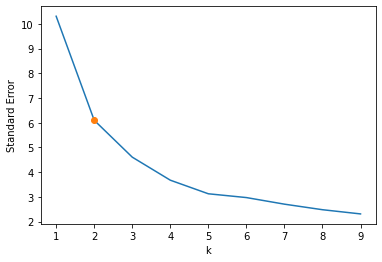

Optimal value for k is 2(elbow method)

For n_clusters=2, The Silhouette Coefficient is 0.5542523341217795

For n_clusters=3, The Silhouette Coefficient is 0.48958970716004285

For n_clusters=4, The Silhouette Coefficient is 0.4873390925482615

For n_clusters=5, The Silhouette Coefficient is 0.47575864543863905

For n_clusters=6, The Silhouette Coefficient is 0.481706020961536

For n_clusters=7, The Silhouette Coefficient is 0.4273693042692287

For n_clusters=8, The Silhouette Coefficient is 0.410793870704832

For n_clusters=9, The Silhouette Coefficient is 0.3951851533659928

For n_clusters=10, The Silhouette Coefficient is 0.37882569611279154

Maximum Silhouette Coefficient is 0.5542523341217795 for n_clusters = 2

hence it is chosen as Optimal Number of clusters


In [6]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
SSE =[]
#running the loop for a range of values of k and calculating SSE
for i in range(1, 10):
    km = KMeans(n_clusters = i).fit(data)
    SSE.append(sum(np.min(cdist(data,km.cluster_centers_,'euclidean'),axis=1))/data.shape[0])

    
plt.plot(range(1, 10), SSE)
plt.xlabel('k')
plt.plot(2, SSE[1], marker='o')
plt.ylabel('Standard Error')
plt.show()
print("Optimal value for k is 2(elbow method)")


''' Using Silhouette Coefficient to verify the Optimal Number of Clusters '''
max_silhouette_score = 0.0
optimum_cluster = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    if(sil_coeff > max_silhouette_score):
        max_silhouette_score = sil_coeff
        optimum_cluster = n_cluster
    print("\nFor n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

print("\nMaximum Silhouette Coefficient is",max_silhouette_score, "for n_clusters =",optimum_cluster)
print("\nhence it is chosen as Optimal Number of clusters".format(max_silhouette_score,optimum_cluster))

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [7]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing

### Important!!!
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)


print("X-Train Shape: ",X_train.shape) 
print("X-Test Shape: ",X_test.shape)
print("Y-Train Shape: ",y_train.shape)
print("Y-Test Shape: ",y_test.shape)

###################end code for Task 1-b-1

X-Train Shape:  (364, 17)
X-Test Shape:  (156, 17)
Y-Train Shape:  (364,)
Y-Test Shape:  (156,)


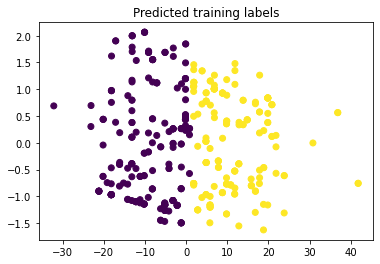

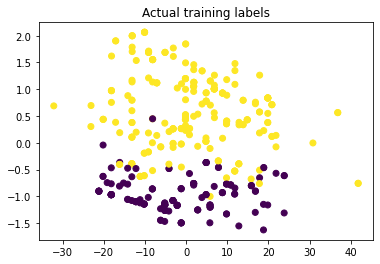

In [8]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kms = KMeans(n_clusters=2, random_state=0).fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
ci=kms.predict(X_train)
# Model and fit the data to the PCA model
X_train_pca =  PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

#plotting the graphs
plt.title("Predicted training labels")
plt.scatter(x,y,c=ci)
plt.show()
plt.title("Actual training labels")
plt.scatter(x,y,c=y_train)
plt.show()

###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

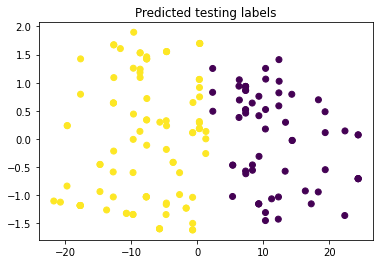

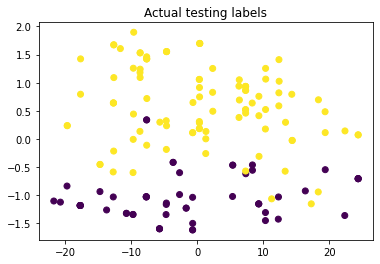

In [9]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
kms1 = KMeans(n_clusters=2, random_state=0).fit(X_test)

# predict cluster index for each sample 
ci1=kms1.predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.title("Predicted testing labels")
plt.scatter(x,y,c=ci1)
plt.show()
plt.title("Actual testing labels")
plt.scatter(x,y,c=y_test)
plt.show()

###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [10]:
###################begin code for Task 1-b-4: Print out a confusion matrix
###################begin code for Task 1-b-4: Print out a confusion matrix
cm=confusion_matrix(y_train,ci)
print("Confusion matrix for training data \n",cm)
print("Confusion matrix for training data \n",confusion_matrix(y_test, ci1))

###################end code for Task 1-b-4
###################end code for Task 1-b-4

Confusion matrix for training data 
 [[ 84  58]
 [117 105]]
Confusion matrix for training data 
 [[20 38]
 [42 56]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [11]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train
cos_distance = pairwise_distances(pdm_train,metric='cosine')
euc_distance = pairwise_distances(pdm_train,metric='euclidean')
man_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cos_distance)
cos_comp_f1 = f1_score(y_train,cos_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euc_distance)
euc_comp_f1 = f1_score(y_train,euc_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(man_distance)
man_comp_f1 = f1_score(y_train,man_comp)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cos_distance)
cos_avg_f1 = f1_score(y_train,cos_avg)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euc_distance)
euc_avg_f1 = f1_score(y_train,euc_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(man_distance)
man_avg_f1 = f1_score(y_train,man_avg)


print("F1-score for complete linkage + cosine", cos_comp_f1)
print("F1-score for complete linkage + euclidean", euc_comp_f1)
print("F1-score for complete linkage + manhattan", man_comp_f1)
print("F1-score for average linkage + cosine", cos_avg_f1)
print("F1-score for average linkage + euclidean", euc_avg_f1)
print("F1-score for average linkage + manhattan", man_avg_f1)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.7534246575342465
F1-score for complete linkage + euclidean 0.33333333333333337
F1-score for complete linkage + manhattan 0.21527777777777776
F1-score for average linkage + cosine 0.008968609865470852
F1-score for average linkage + euclidean 0.04405286343612334
F1-score for average linkage + manhattan 0.04405286343612334


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

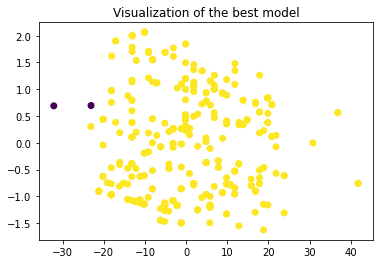

In [12]:
models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':
    best_model = cos_comp

elif best_model_val == 'euc_comp':
    best_model = euc_comp

elif best_model_val == 'man_comp':
    best_model = man_comp

elif best_model_val == 'cos_avg':
    best_model = cos_avg

elif best_model_val == 'euc_avg':
    best_model = euc_avg

elif best_model_val == 'man_avg':
    best_model = man_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:,0]
y = X_train_pca[:,1]

#Plotting the graphs
plt.scatter(x,y,c=best_model)
plt.title("Visualization of the best model")
plt.show()

# TASK 3:  WEKA Visualization of K-means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a : Visualize the k-means clustering using weka

In [13]:
###################start Task 3-a

print("K-means using Weka screenshots is shown below:")

###################end Task 3-a

K-means using Weka screenshots is shown below:


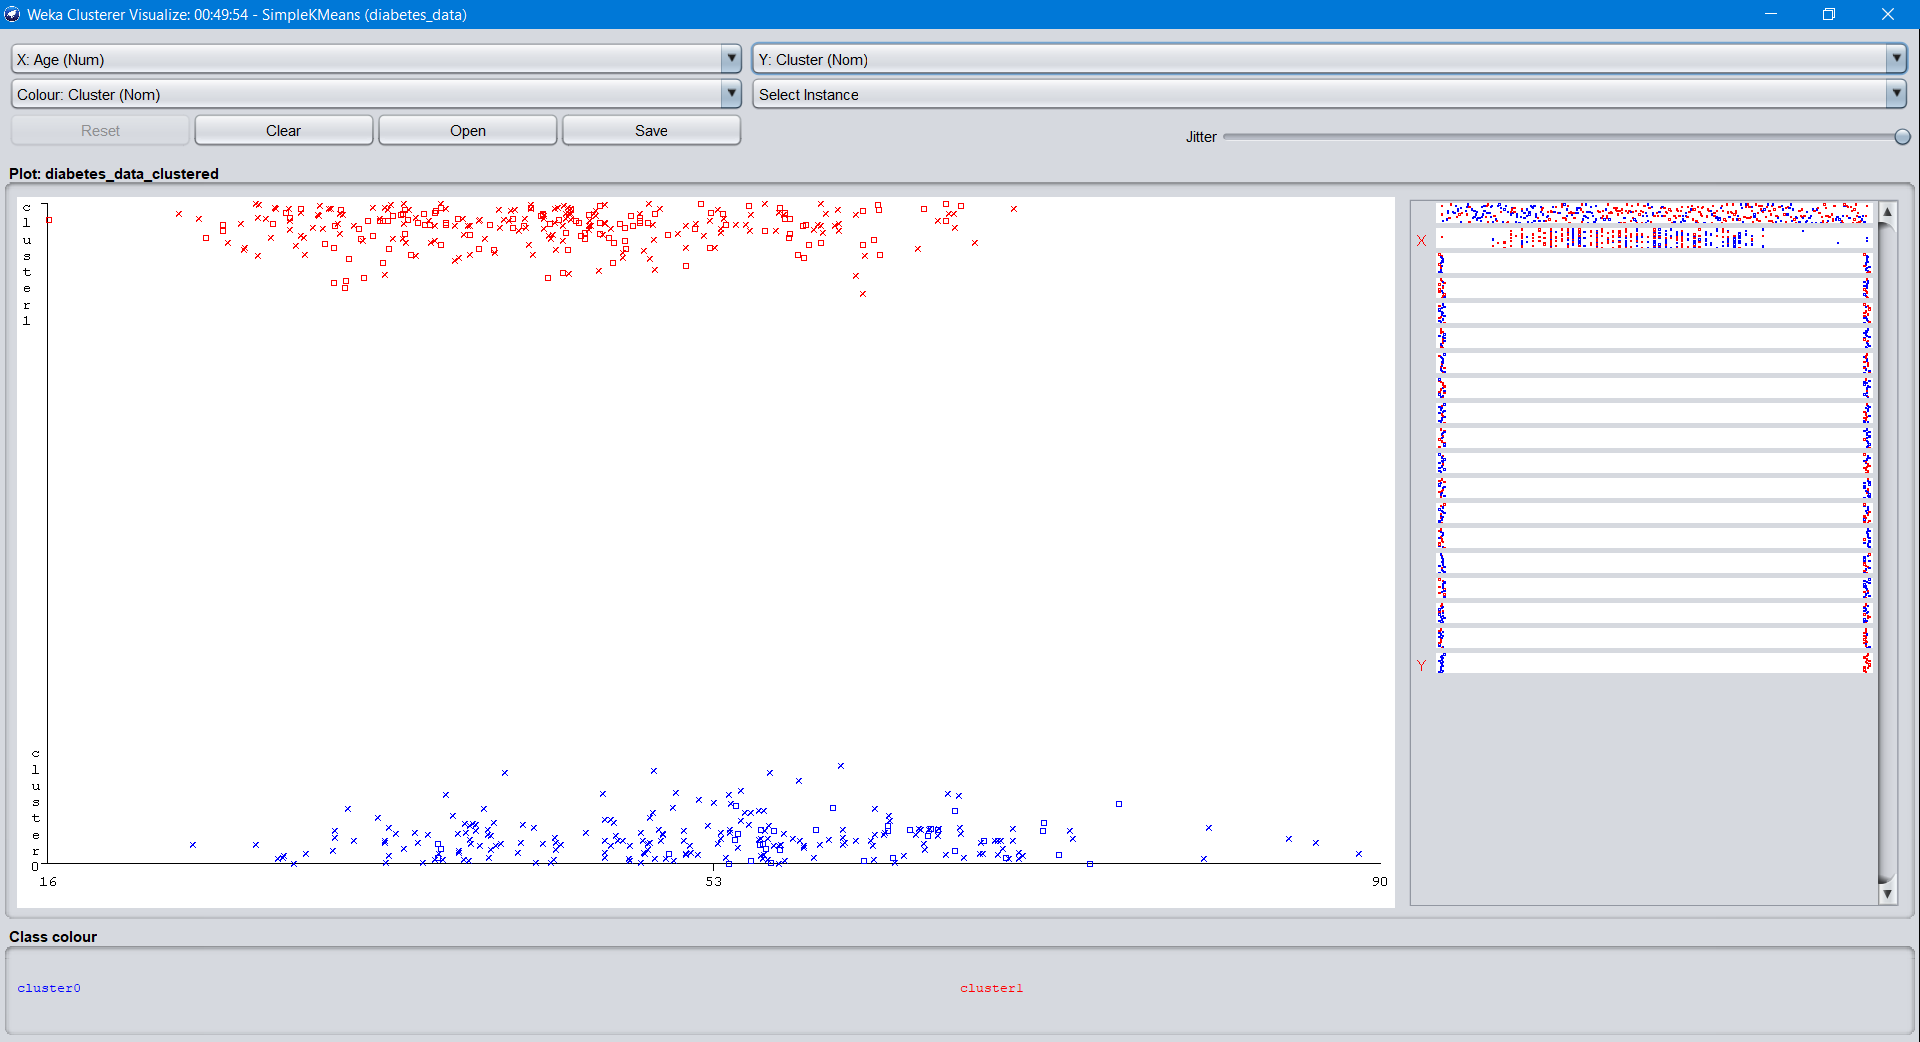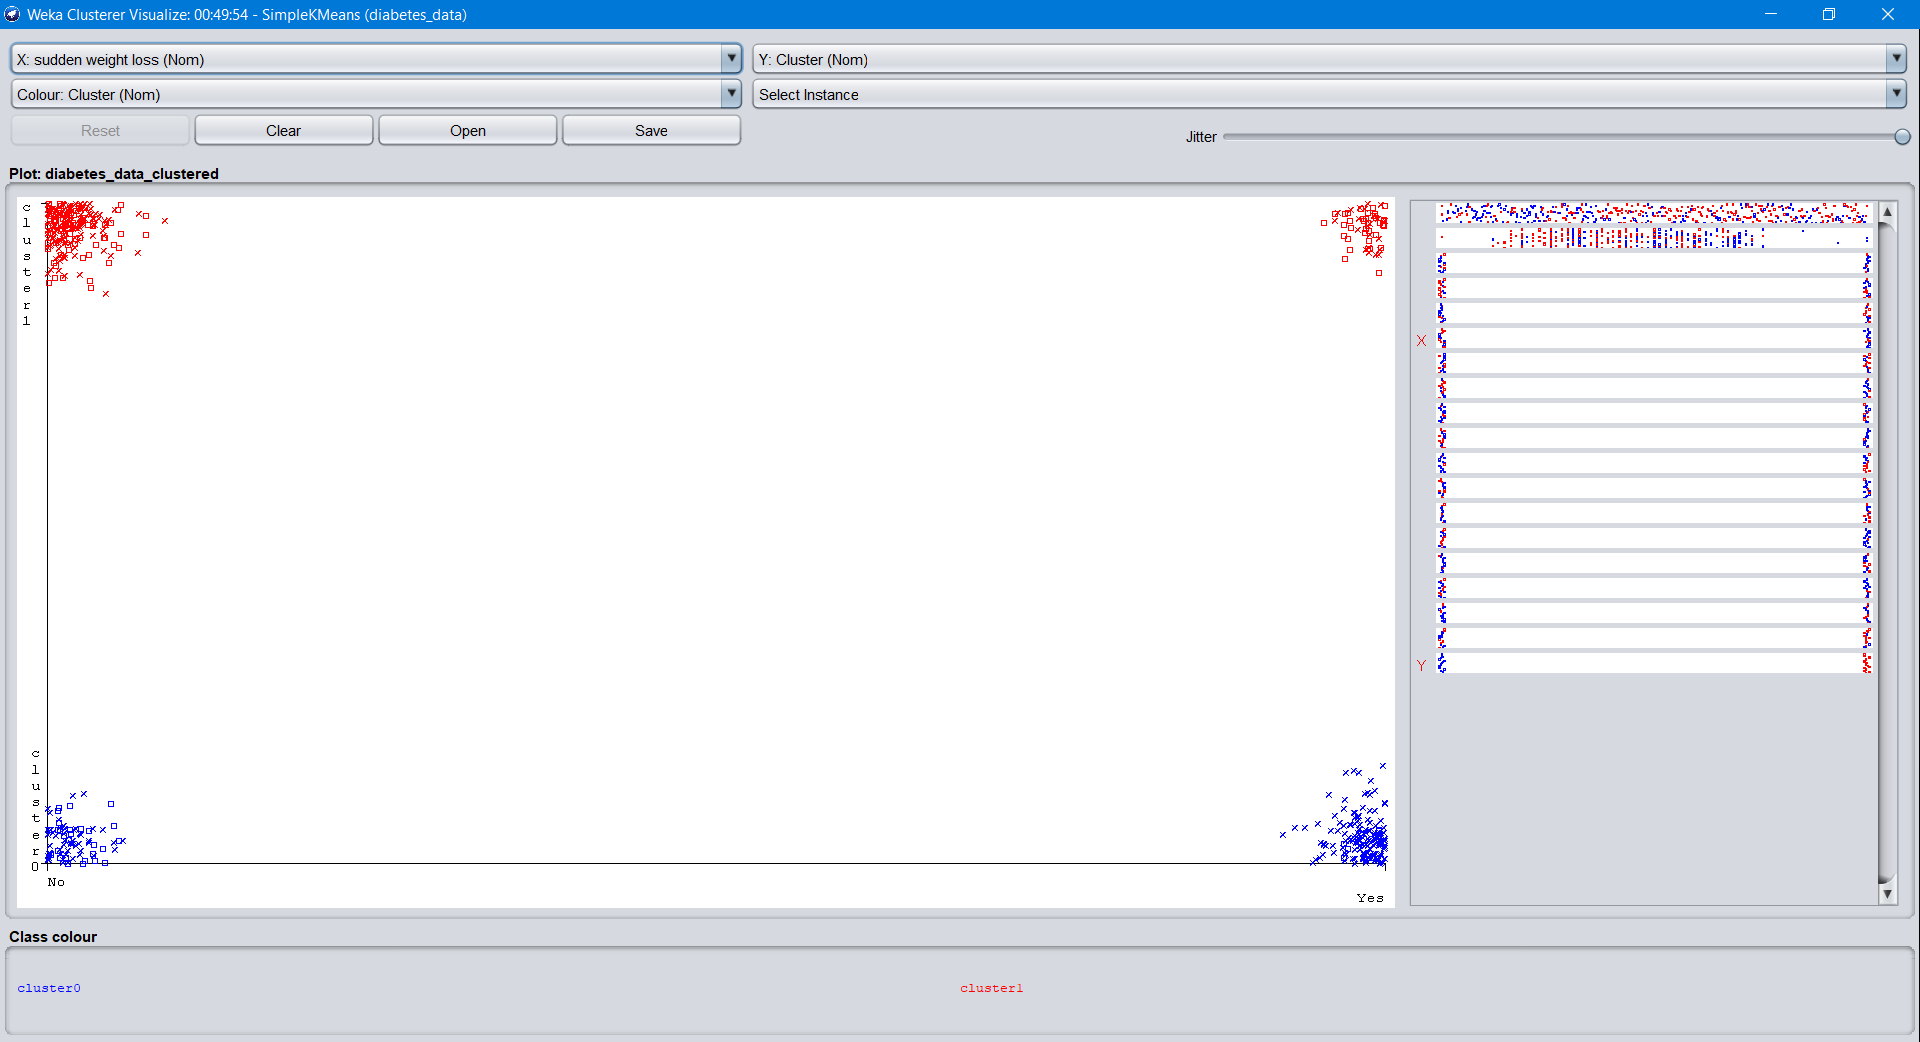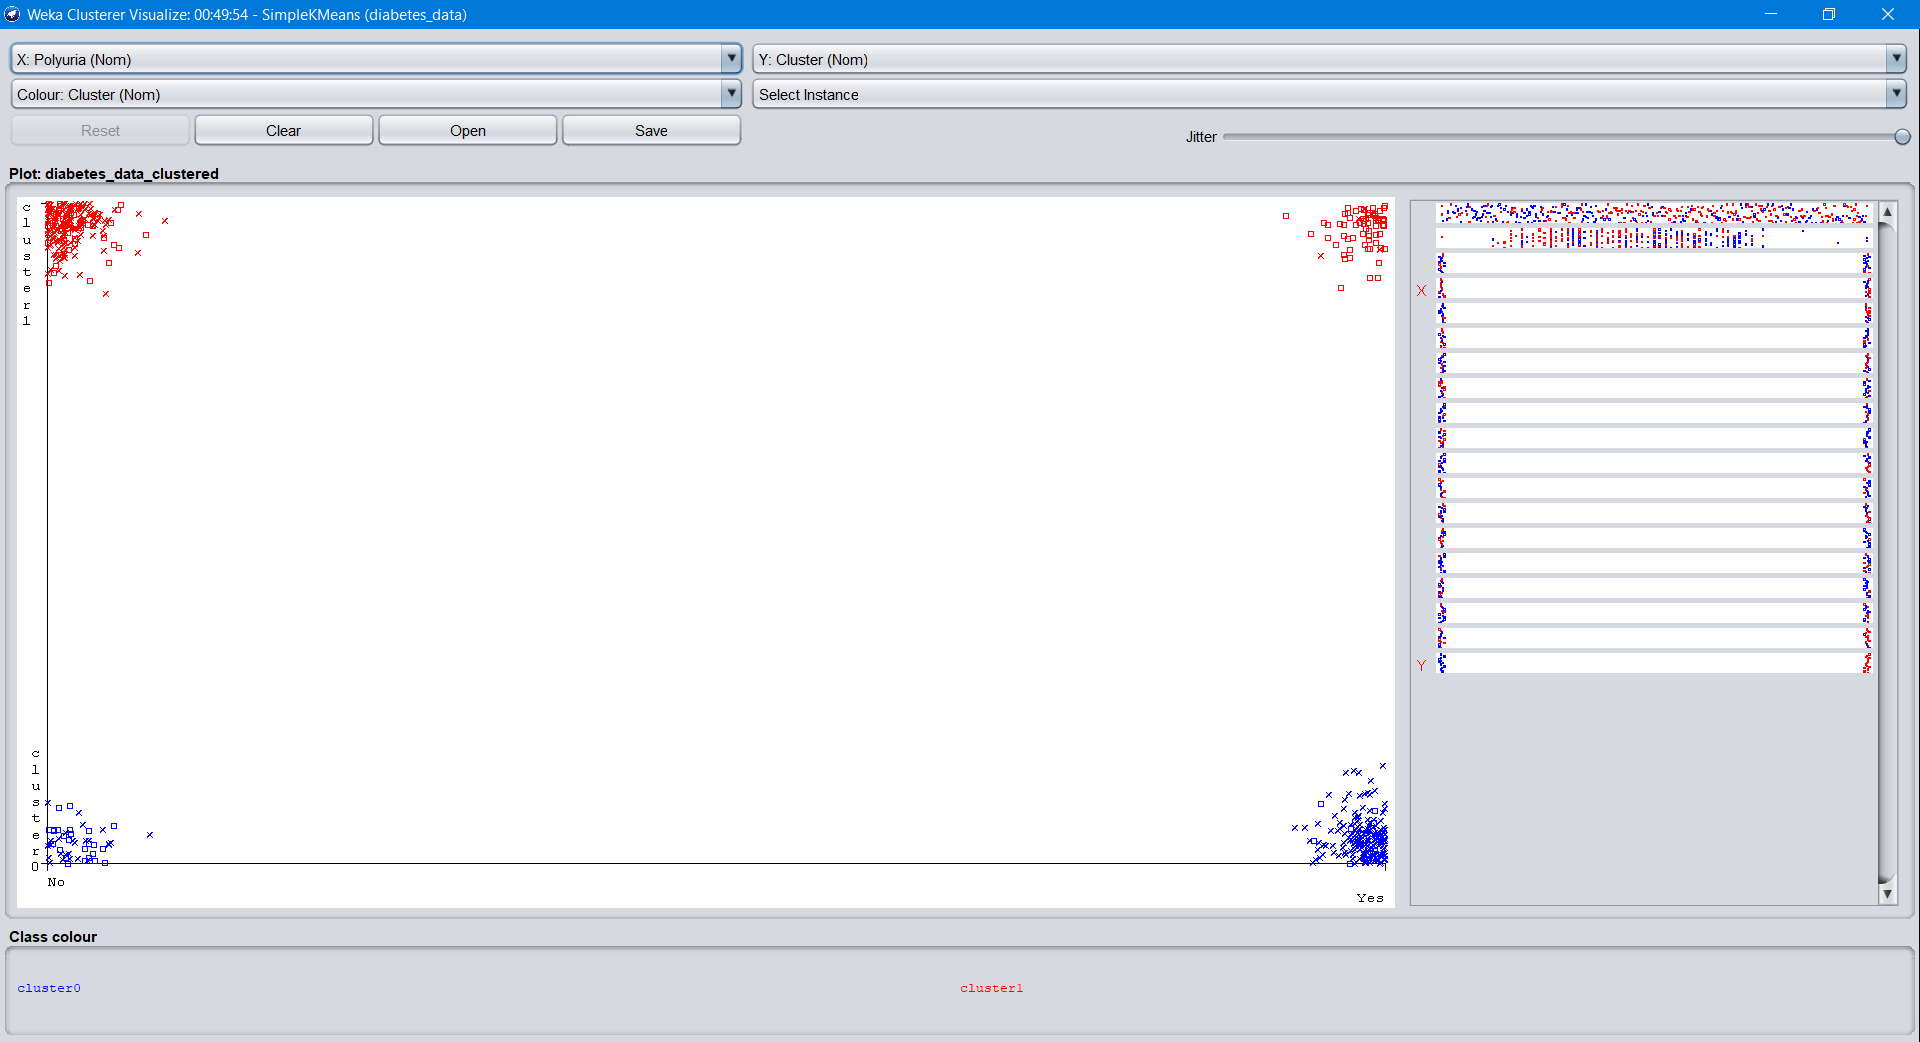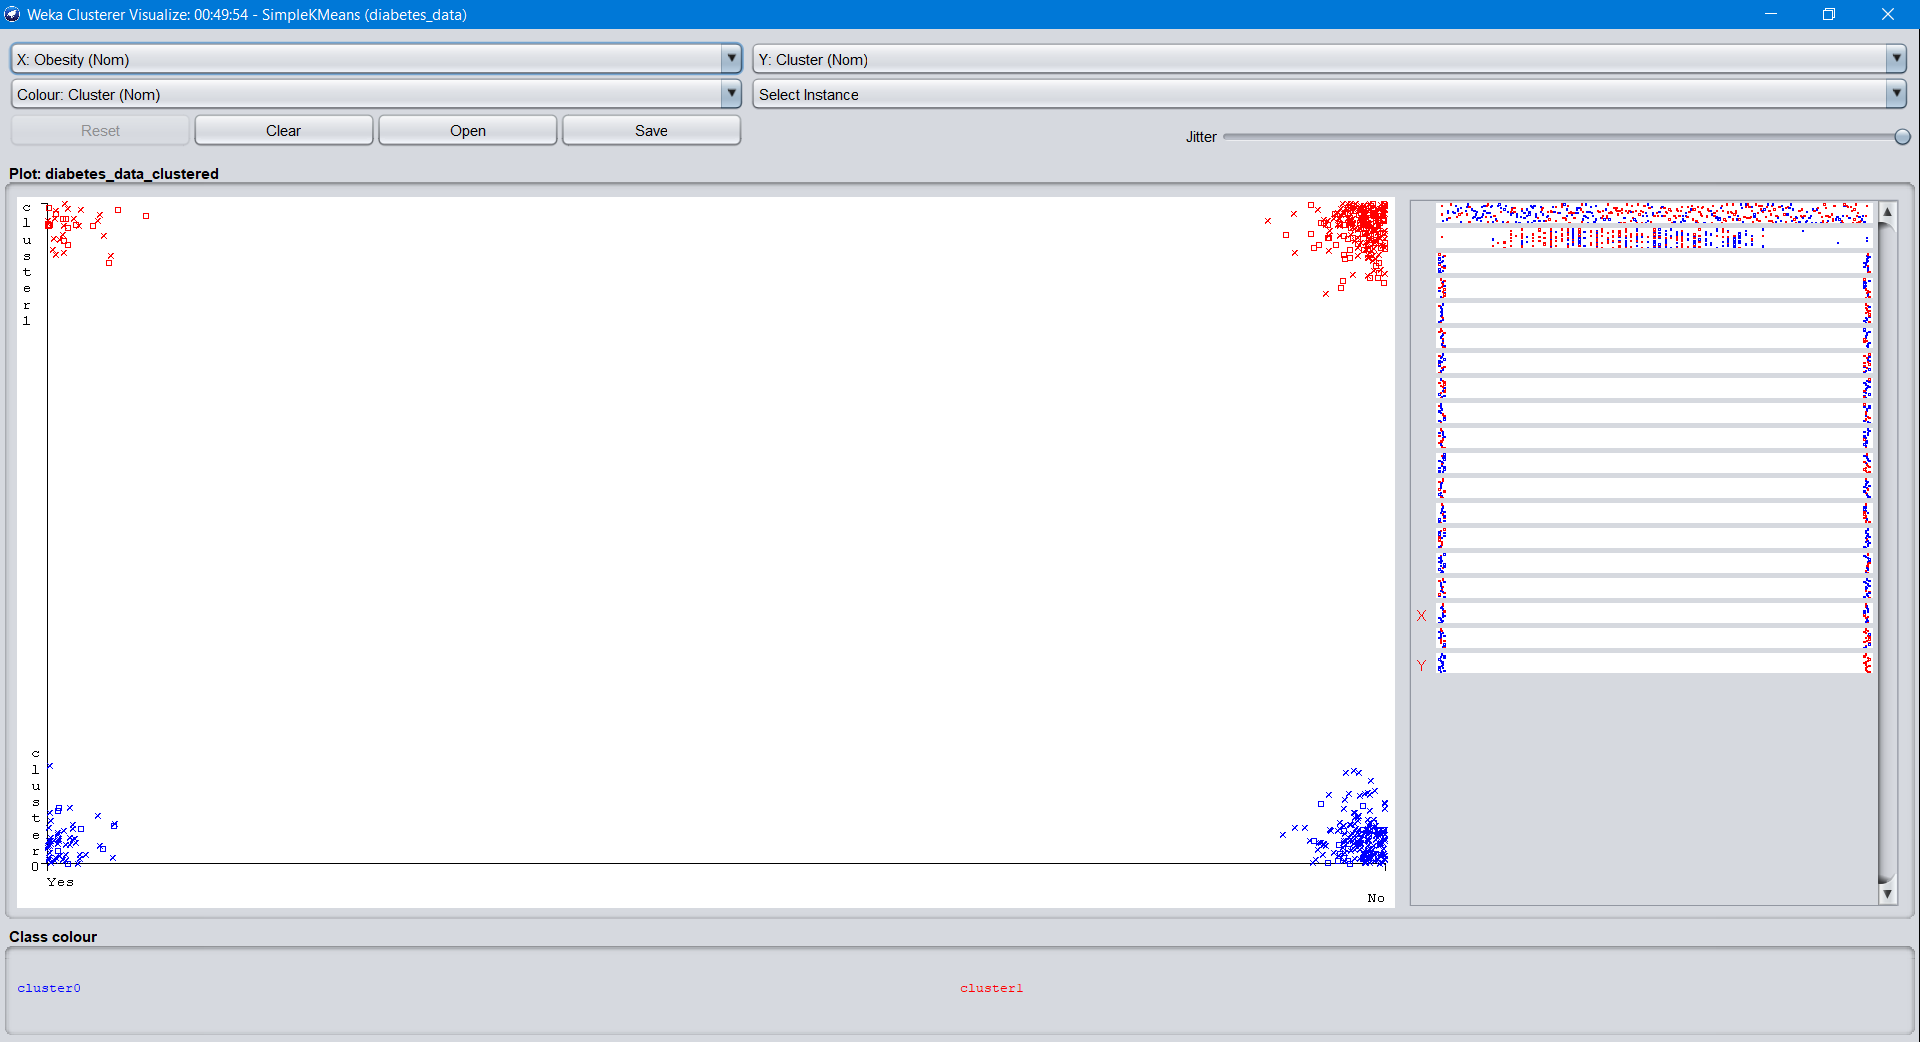

## Task 3-b : Visualize the hierarchical clustering using weka

In [14]:
###################start Task 3-b

print("Hierarchical Clustering using Weka screenshots is shown below:")

###################end Task 3-b

Hierarchical Clustering using Weka screenshots is shown below:


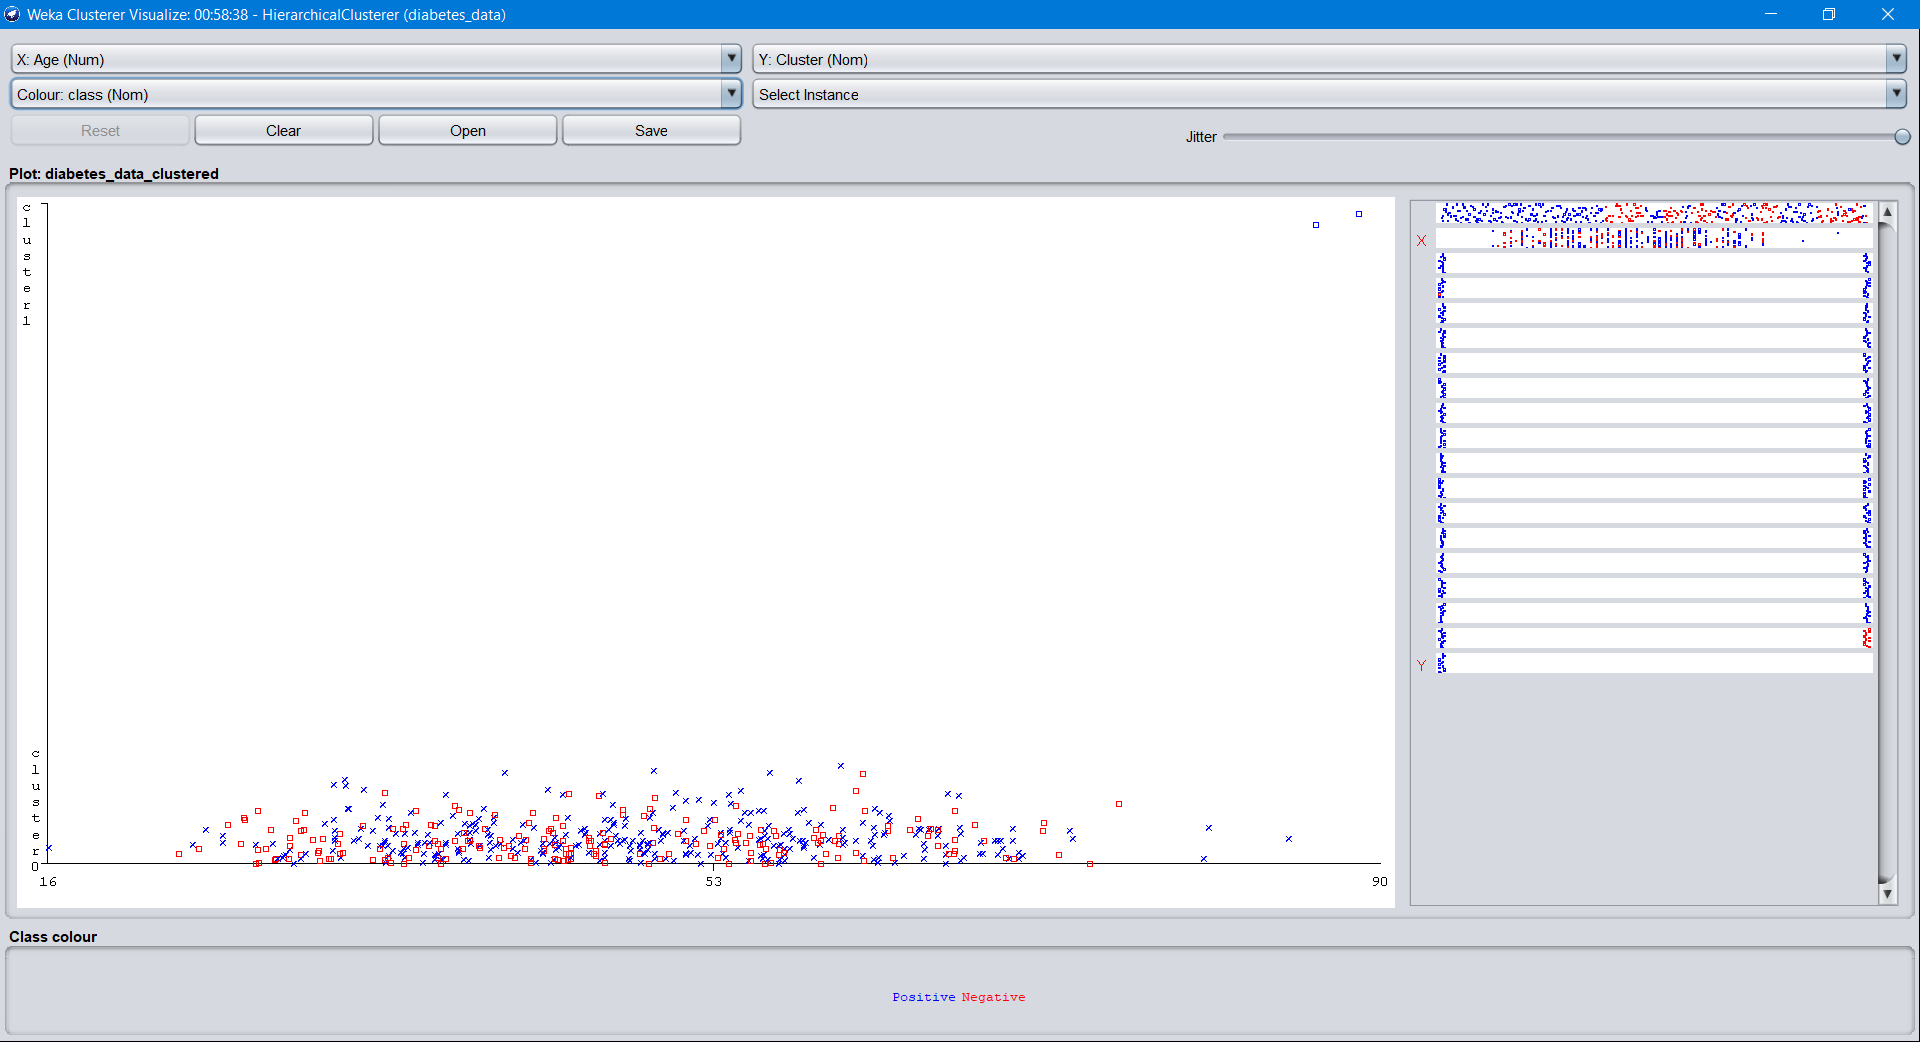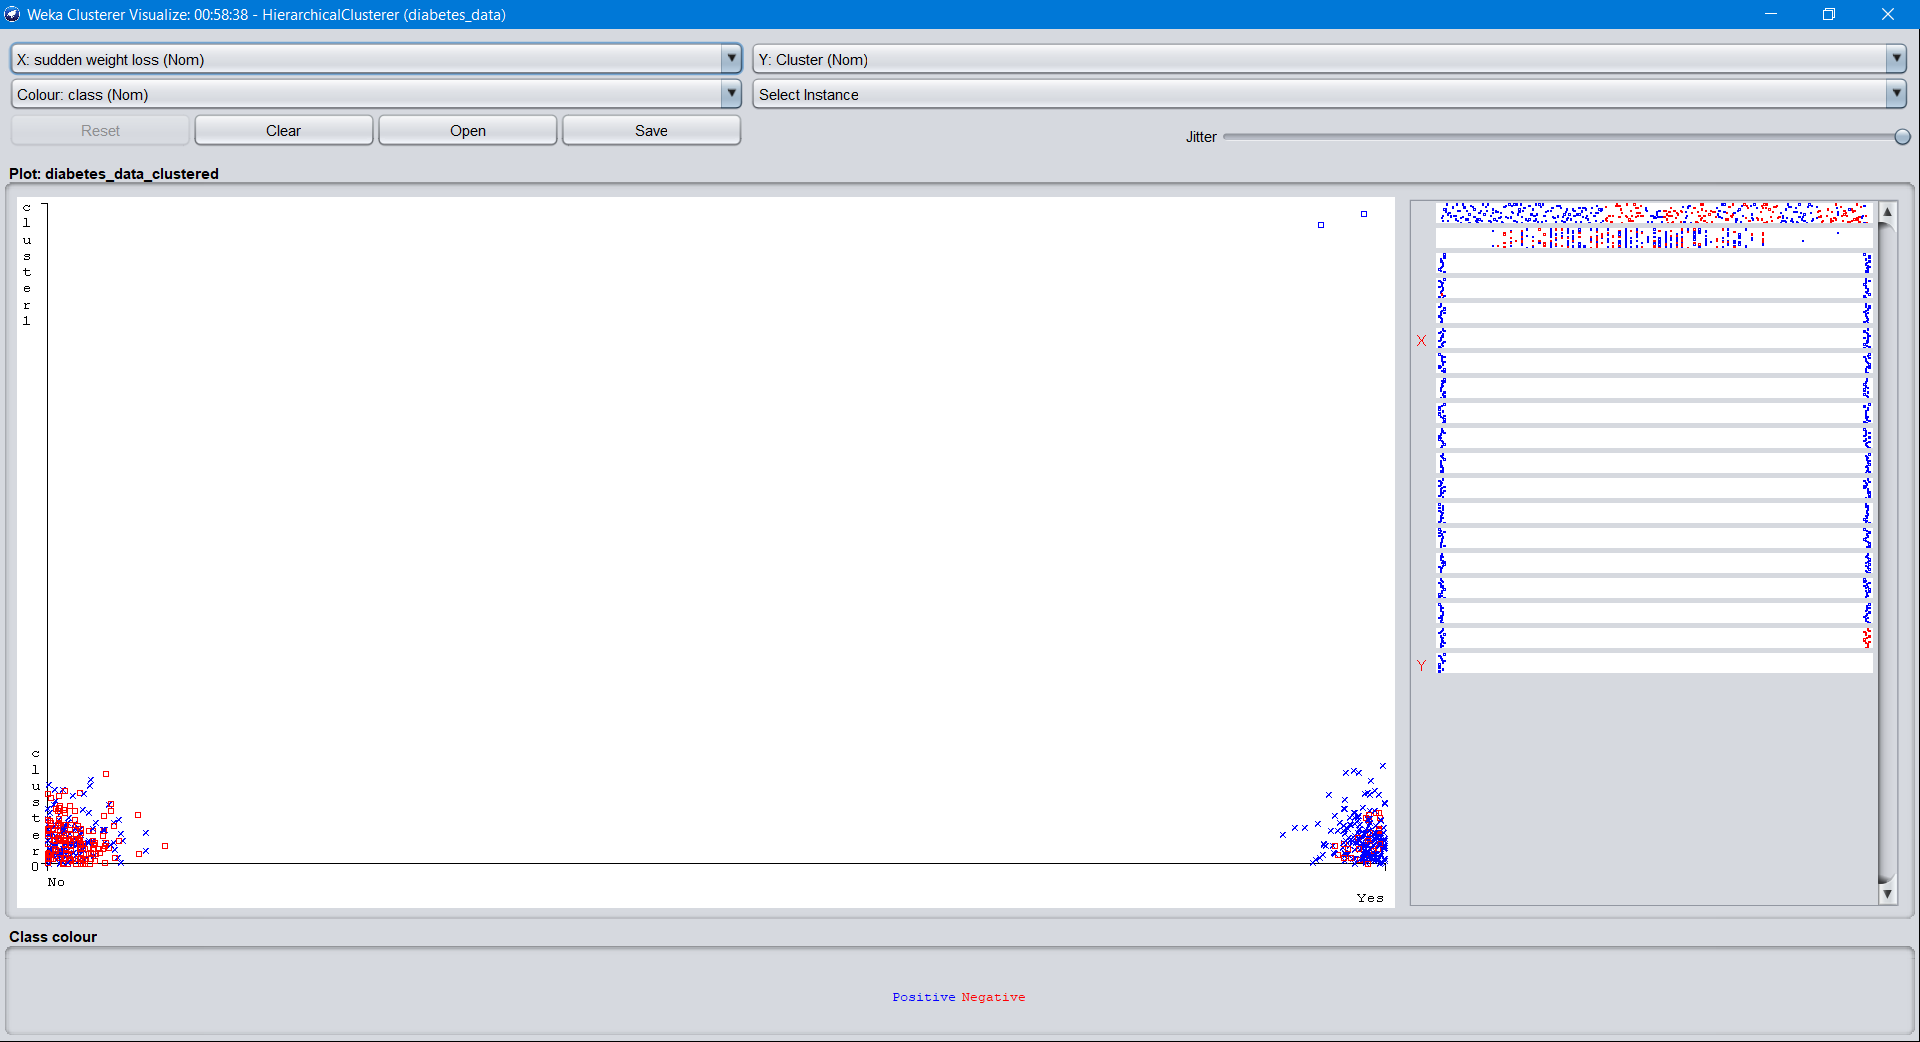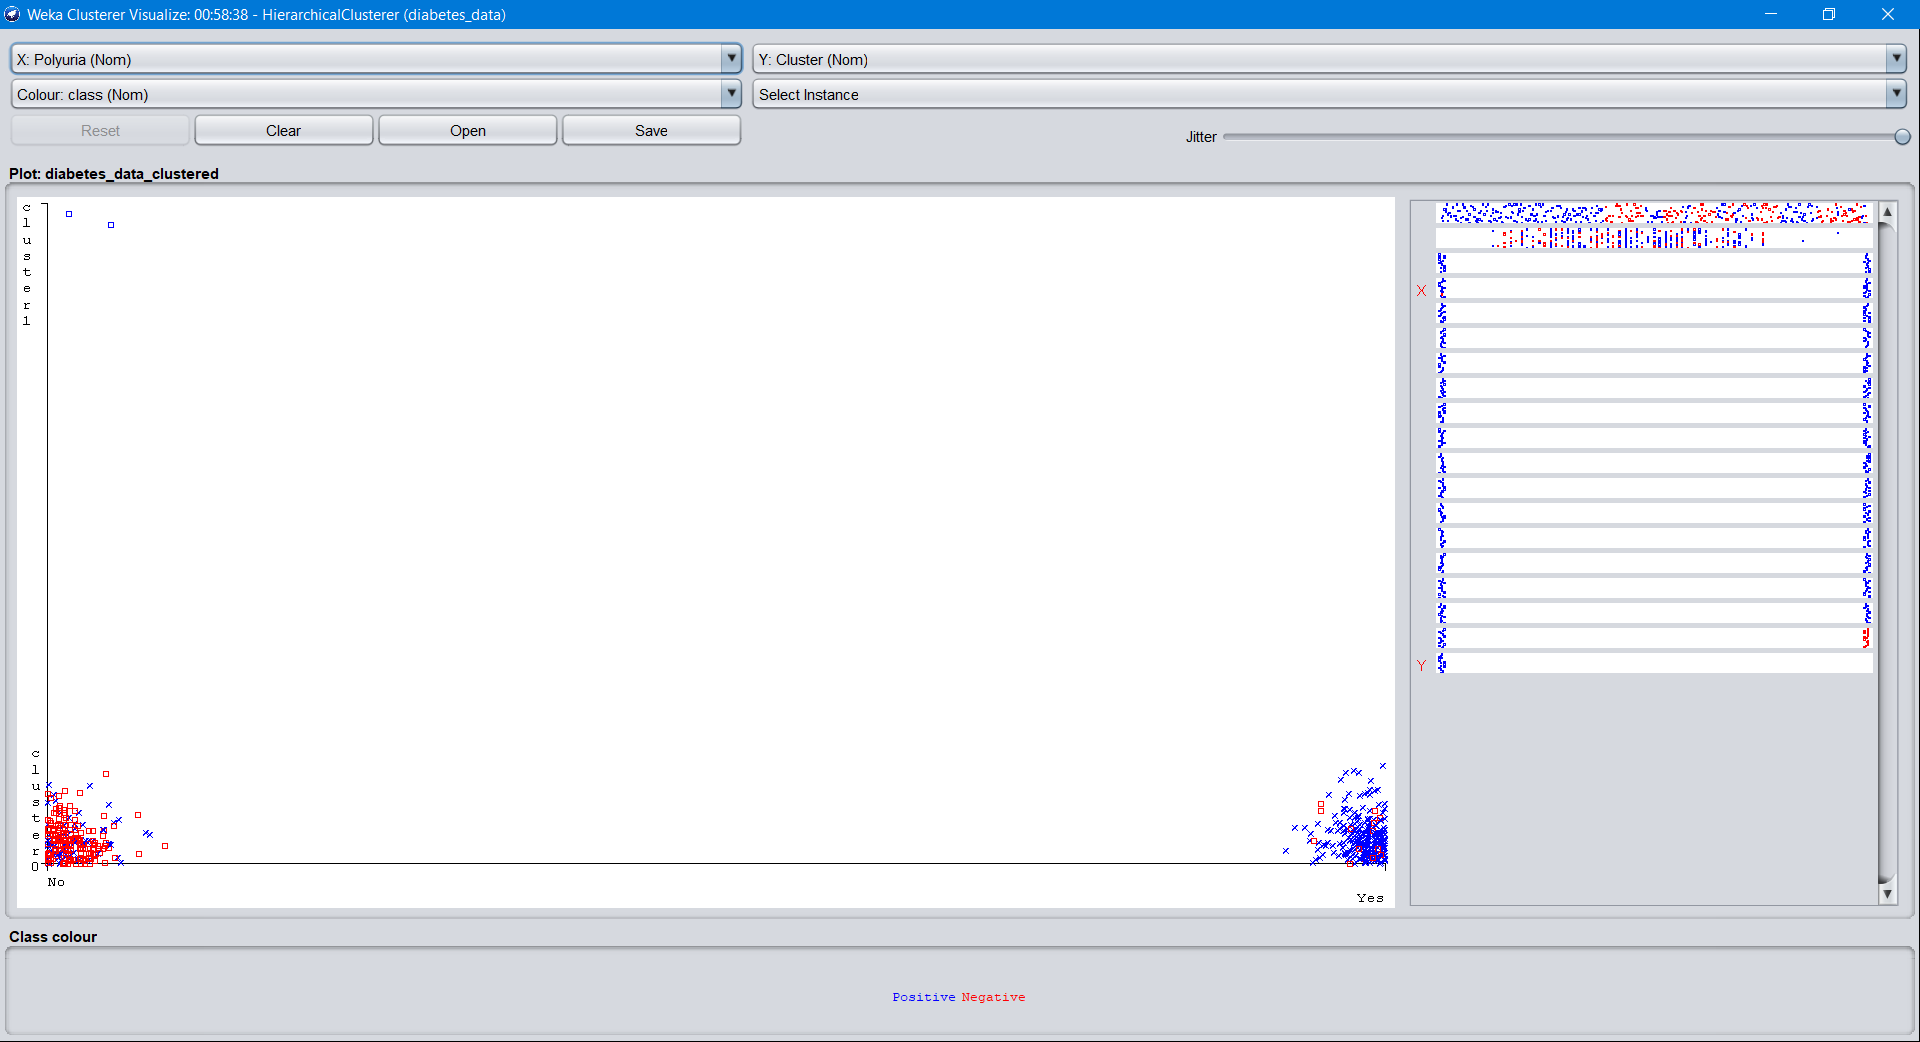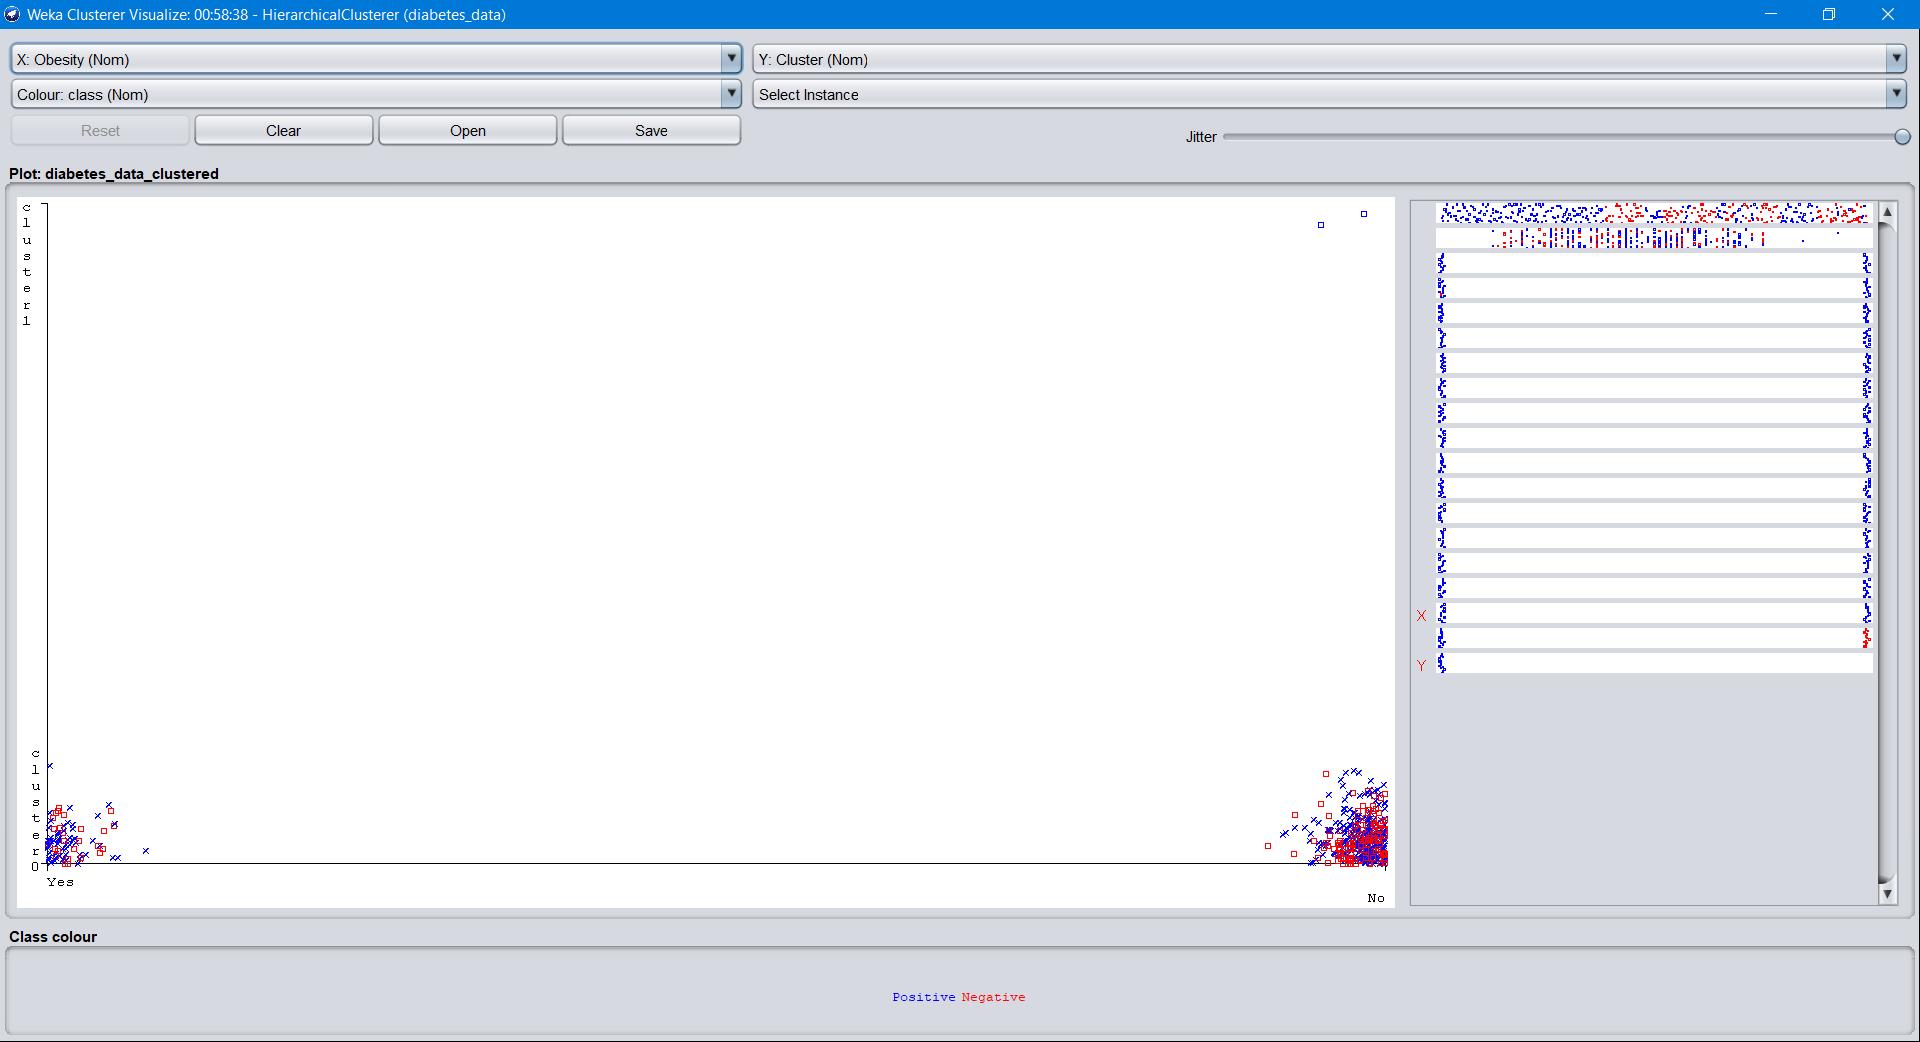


# TASK 4:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 4-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

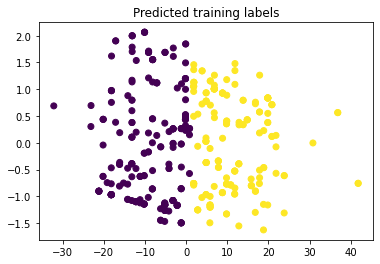

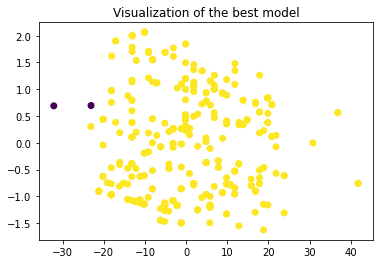

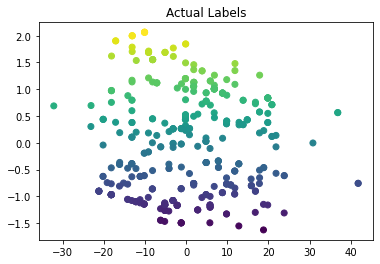

In [15]:
###################begin code for Task 4-a: Visualize the predicted training labels vs actual training labels
kms = KMeans(n_clusters=2, random_state=0).fit(X_train)
ci=kms.predict(X_train)

plt.title("Predicted training labels")
plt.scatter(x,y,c=ci)
plt.show()

pdm_train = X_train
cos_distance = pairwise_distances(pdm_train,metric='cosine')
euc_distance = pairwise_distances(pdm_train,metric='euclidean')
man_distance = pairwise_distances(pdm_train,metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cos_distance)
cos_comp_f1 = f1_score(y_train,cos_comp)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euc_distance)
euc_comp_f1 = f1_score(y_train,euc_comp)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(man_distance)
man_comp_f1 = f1_score(y_train,man_comp)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cos_distance)
cos_avg_f1 = f1_score(y_train,cos_avg)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euc_distance)
euc_avg_f1 = f1_score(y_train,euc_avg)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(man_distance)
man_avg_f1 = f1_score(y_train,man_avg)

models = {'cos_comp':cos_comp_f1,'euc_comp':euc_comp_f1,'man_comp':man_comp_f1,'cos_avg':cos_avg_f1,'euc_avg':euc_avg_f1,'man_avg':man_avg_f1}
best_model_val = max(models,key=models.get)

if best_model_val == 'cos_comp':
    best_model = cos_comp

elif best_model_val == 'euc_comp':
    best_model = euc_comp

elif best_model_val == 'man_comp':
    best_model = man_comp

elif best_model_val == 'cos_avg':
    best_model = cos_avg

elif best_model_val == 'euc_avg':
    best_model = euc_avg

elif best_model_val == 'man_avg':
    best_model = man_avg

else:
    best_model = None

X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:,0]
y = X_train_pca[:,1]

#Plotting the graphs
plt.scatter(x,y,c=best_model)
plt.title("Visualization of the best model")
plt.show()

plt.title("Actual Labels")
plt.scatter(x,y,c=y)
plt.show()

###################end code for Task 4-a

## Task 4-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [17]:
###################begin code for Task 4-b

X = data[data.columns[:-1]]
y = data[data.columns[-1]]

kdata = KMeans(n_clusters=2,random_state=0)
kdataFit = kdata.fit_predict(X)

print("The following is the confusion matrix for K-Means Clustering")
kconfusion = confusion_matrix(y, kdataFit)
print(kconfusion)
print("\n")

print("The following is the confusion matrix for Hierarchical Agglomerative Clustering")
aconfusion = confusion_matrix(y_train, best_model)
print(aconfusion)
print("\n")

print("The following is the precision for K-Means Clustering ")
kPrecision = precision_score(y, kdataFit)
print(kPrecision)
print("\n")

print("The following is the precision for Hierarchical Agglomerative Clustering ")
aPrecision = precision_score(y_train, best_model)
print(aPrecision)
print("\n")

print("The following is the recall for K-Means Clustering ")
kRecall = recall_score(y, kdataFit)
print(kRecall) 
print("\n")

print("The following is the recall for Hierarchical Agglomerative Clustering ")
aRecall = recall_score(y_train, best_model)
print(aRecall)
print("\n")

print("The following is the F1 score for K-Means Clustering ")
kF1Score = f1_score(y, kdataFit)
print(kF1Score)
print("\n")

print("The following is the F1 score for Hierarchical Agglomerative Clustering ")
aF1Score = f1_score(y_train, best_model)
print(aF1Score)
print("\n")

print("Reasoning: ")
print("\nWe can observe that :\nHierarchical Agglomerative Clustering has higher precision value than K-Means Clustering\nHierarchical Agglomerative Clustering has higher recall value than K-Means Clustering\nHierarchical Agglomerative Clustering has higher F1 value than K-Means Clustering")
print("Hence we can say that Hierarchical Agglomerative Clustering is better than K-Means Clustering since Agglomerative Clustering starts with n clusters rather than k, clustering is more accurate and well separated.")
print("Since we have a smaller dataset and a variety of data also selecting the best fit gives us better precision, recall, and f1 score\n")
###################end code for Task 4-b

The following is the confusion matrix for K-Means Clustering
[[ 78 122]
 [147 173]]


The following is the confusion matrix for Hierarchical Agglomerative Clustering
[[  0 142]
 [  2 220]]


The following is the precision for K-Means Clustering 
0.5864406779661017


The following is the precision for Hierarchical Agglomerative Clustering 
0.6077348066298343


The following is the recall for K-Means Clustering 
0.540625


The following is the recall for Hierarchical Agglomerative Clustering 
0.990990990990991


The following is the F1 score for K-Means Clustering 
0.5626016260162602


The following is the F1 score for Hierarchical Agglomerative Clustering 
0.7534246575342465


Reasoning: 

We can observe that :
Hierarchical Agglomerative Clustering has higher precision value than K-Means Clustering
Hierarchical Agglomerative Clustering has higher recall value than K-Means Clustering
Hierarchical Agglomerative Clustering has higher F1 value than K-Means Clustering
Hence we can say that H

In [1]:
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# Reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[25 points] Task 1:</b>  

    [05 points] Task 1-a: Determine “k” value from the elbow method

    [20 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [05 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [05 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[30 points] Task 2:</b>  

    [20 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering

<b>[20 points] Task 3:</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points

<b>[20 points] Task 4:</b> 

    Task 4-a: 10 points

    Task 4-b: 10 points